In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/colab_projects/Image_classification/happy
!ls /content/drive/MyDrive/colab_projects/Image_classification/sad


ls: cannot access '/content/drive/MyDrive/colab_projects/Image_classification/happy': No such file or directory
ls: cannot access '/content/drive/MyDrive/colab_projects/Image_classification/sad': No such file or directory


In [3]:
!pip install tensorflow gpu opencv python matplotlib

ERROR: Could not find a version that satisfies the requirement gpu (from versions: none)
ERROR: No matching distribution found for gpu


In [4]:
!pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
absolufy-imports                      0.3.1
accelerate                            1.10.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.12.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
alembic                               1.16.5
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.10.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  25.1.0
array_record                          0.8.1
arrow 

In [5]:
import tensorflow as tf
import os  #os is used to navigate through files

In [6]:
#Avoid OOM(out of memory) by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
# from google.colab import files
# uploaded = files.upload()


In [8]:
# import zipfile
# import io

# with zipfile.ZipFile(io.BytesIO(uploaded['happy.zip']), 'r') as zip_ref:
#     zip_ref.extractall('happy')


In [9]:
# from google.colab import files
# uploaded = files.upload()


In [10]:
# import zipfile
# import io

# with zipfile.ZipFile(io.BytesIO(uploaded['sad.zip']), 'r') as zip_ref:
#     zip_ref.extractall('sad')


**Remove Dodgy images**

In [11]:
import cv2
import imghdr

/tmp/ipython-input-4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [12]:
!mkdir -p data
!cp -r "/content/drive/MyDrive/Image_classification/happy" data/
!cp -r "/content/drive/MyDrive/Image_classification/sad" data/


In [13]:
data_dir = data_dir = 'data'


In [14]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [15]:
image_exts[0]

'jpeg'

In [16]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext file {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      #os.remove(image_path)

Image not in ext file data/happy/getty_478389113_970647970450091_99776.webp
Image not in ext file data/happy/ACg8ocL_VVgWm2QKxFECn_o9WIMY7u-5v1SLRW-oG6_SY2lbFbBzv0w.webp
Image not in ext file data/happy/istock-508455188-033183f45ba393ed4745b2dd1213c390.jpg
Image not in ext file data/happy/eyJidWNrZXQiOiJvbS1wdWItc3RvcmFnZSIsImtleSI6ImFjdGl2ZWJlYXQv.webp
Image not in ext file data/happy/depositphotos_391577690-stock-photo-cheerful-woman-outstretc.jpg
Image not in ext file data/happy/depositphotos_8807359-stock-photo-mixed-race-man-smiling.jpg
Image not in ext file data/happy/getty_152414899_97046097045006_68075.webp
Image not in ext file data/sad/depression (1).jpg
Image not in ext file data/sad/man-with-head-down.jpg
Image not in ext file data/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg


**`Load Data`**

In [19]:
tf.data.Dataset #for making pipeline

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
data = tf.keras.utils.image_dataset_from_directory('data') # this is creating a pipeline

Found 110 files belonging to 2 classes.


In [22]:
#what that utils do
tf.keras.utils.image_dataset_from_directory??

In [23]:
data_iterator = data.as_numpy_iterator() #this is allowing to loop through the pipeline

In [24]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7e56baa95fd0>)

In [25]:
#get another batch from the iterator
batch = data_iterator.next() #this is taking batches

In [26]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [27]:
#class 1 = Sad ppl and 0 = happy ppl
batch[1]

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int32)

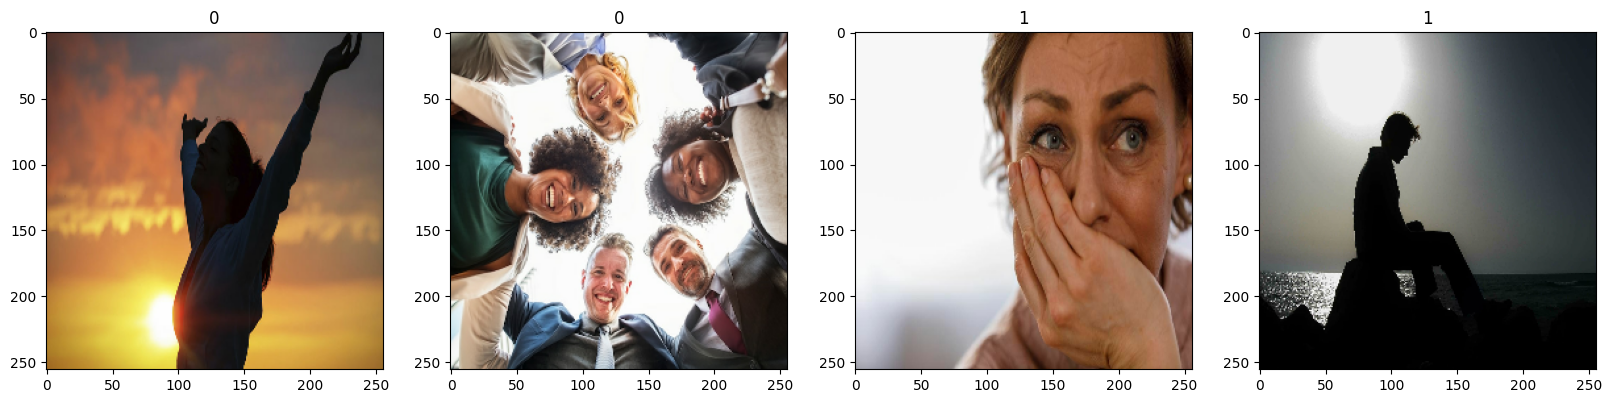

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(batch[1][idx])


In [29]:
scaled = batch[0]/255  #will give valus between 0 and 1

In [30]:
scaled.max()

np.float32(1.0)

**Preprocess the Data**

Scale the Data

In [31]:
data = data.map(lambda x,y: (x/255, y))

In [32]:
scaled_iterator = data.as_numpy_iterator()

In [33]:
batch =scaled_iterator.next()[0]

In [34]:
batch[0].min()

np.float32(0.0)

Split the data

In [35]:
len(data)

4

In [36]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1



In [37]:
train_size + val_size + test_size

4

In [38]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [39]:
len(test)

1

**Building deep learing model**

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [41]:
model = Sequential([])

In [42]:
model.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

**Train**

In [45]:
logdir = 'logs'

In [46]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [47]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 7s/step - accuracy: 0.5104 - loss: 0.9622 - val_accuracy: 0.8125 - val_loss: 0.9509
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 7s/step - accuracy: 0.7708 - loss: 0.8936 - val_accuracy: 0.7188 - val_loss: 0.5660
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.7917 - loss: 0.5899 - val_accuracy: 0.8438 - val_loss: 0.4948
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 6s/step - accuracy: 0.7500 - loss: 0.5277 - val_accuracy: 0.6875 - val_loss: 0.5200
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 8s/step - accuracy: 0.7292 - loss: 0.4754 - val_accuracy: 0.8438 - val_loss: 0.3936
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.8125 - loss: 0.4183 - val_accuracy: 0.7188 - val_loss: 0.5034
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.8021 - loss: 0.3832 - val_accuracy: 0.8750 - val_loss: 0.2972
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 7s/step - accuracy: 0.8021 - loss: 0.3658 - val_accuracy: 0.7500 - val_loss: 0.4260
Epoch 9/

**Plot performance**

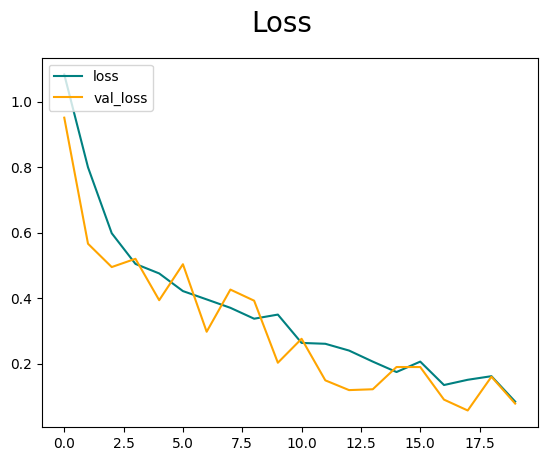

In [48]:
fig=plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

**Evaluation Process**

In [49]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [50]:
pre = Precision
re = Recall
acc = BinaryAccuracy()

In [51]:
len(test)

1

In [61]:
for batch in test.as_numpy_iterator():
   X,y=batch
   yhat=model.predict(X)
   pre.update_state(y, yhat)
   re.update_state(y, yhat)
   acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


In [62]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:0.5, Accuracy:0.3928571343421936


**Test**

In [63]:
import cv2

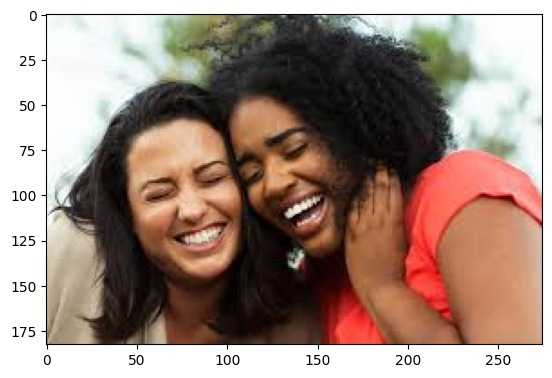

In [70]:
img = cv2.imread("/content/drive/MyDrive/Image_classification/Happy.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

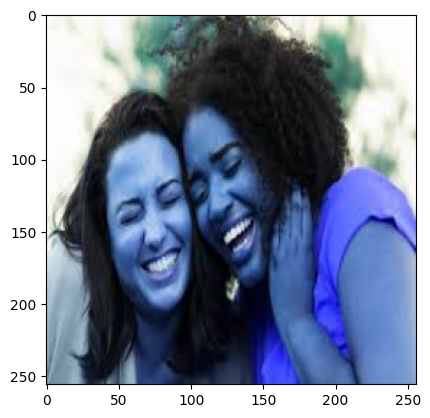

In [72]:
resize=tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


In [74]:
yhat

array([[0.24334554]], dtype=float32)

In [75]:
if yhat > 0.5:
  print('Predicted class is sad')
else:
  print('Predicted class is happy')

Predicted class is happy


**Save the model**

In [76]:
from tensorflow.keras.models import load_model


In [78]:
model.save(os.path.join('models','happysadmodel.h5'))

In [79]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [80]:
new_model

<Sequential name=sequential, built=True>